# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset yang digunakan adalah Heart Disease Dataset. Dataset ini berisi informasi medis pasien seperti usia, tekanan darah, kolesterol, dan kebiasaan hidup untuk memprediksi risiko penyakit jantung (Heart Disease Status). yang didapatkan dari kaggle open source


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
dataset_path = 'HeartDisease_raw/heart_disease.csv'

if not os.path.exists(dataset_path):
    print(f"errors {dataset_path}")
else:
    df = pd.read_csv(dataset_path)
    display(df.head())

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

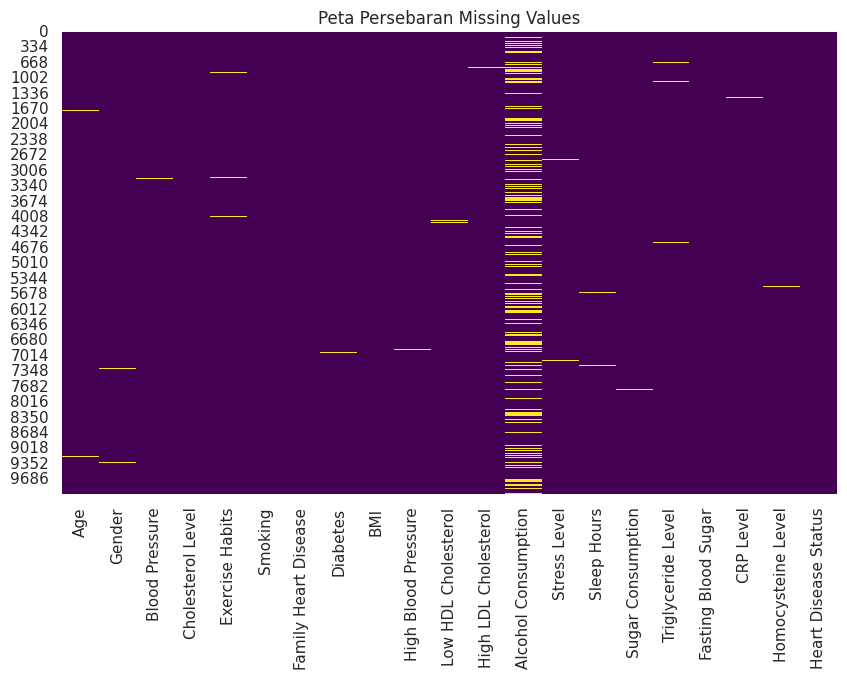

In [3]:
df.info()

print(df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Peta Persebaran Missing Values")
plt.show()

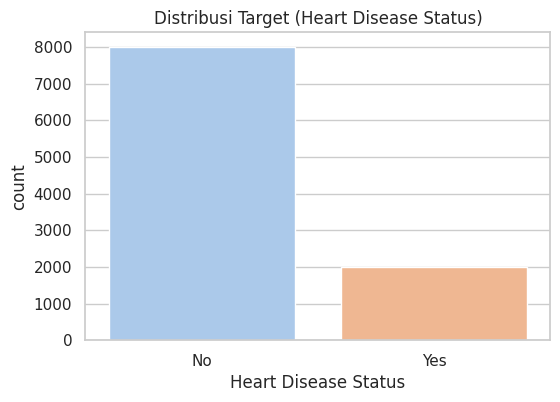

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Heart Disease Status', data=df, palette='pastel')
plt.title("Distribusi Target (Heart Disease Status)")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [5]:
print("Handling Missing Values...")

num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

for col in num_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

for col in cat_cols:
    if not df[col].mode().empty:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
    else:
        df[col] = df[col].fillna("Unknown")

print(f"Sisa Missing Values: {df.isnull().sum().sum()}")

Handling Missing Values...
Sisa Missing Values: 0


In [6]:
ordinal_map = {'Low': 0, 'Medium': 1, 'High': 2}
ordinal_cols = ['Exercise Habits', 'Alcohol Consumption', 'Stress Level', 'Sugar Consumption']

for col in ordinal_cols:
    if col in df.columns:
        df[col] = df[col].map(ordinal_map)

binary_map = {'No': 0, 'Yes': 1}
binary_cols = ['Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure',
               'Low HDL Cholesterol', 'High LDL Cholesterol', 'Heart Disease Status']

for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].map(binary_map)

if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

display(df.head())

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,0,153.0,155.0,2,1,1,0,24.991591,1,...,0,2,1,7.633228,1,342.0,120.0,12.969246,12.387250,0
1,69.0,1,146.0,286.0,2,0,1,1,25.221799,0,...,0,1,2,8.744034,1,133.0,157.0,9.355389,19.298875,0
2,46.0,0,126.0,216.0,0,0,0,0,29.855447,0,...,1,0,0,4.440440,0,393.0,92.0,12.709873,11.230926,0
3,32.0,1,122.0,293.0,2,1,1,0,24.130477,1,...,1,0,2,5.249405,2,293.0,94.0,12.509046,5.961958,0
4,60.0,0,166.0,242.0,0,1,1,1,20.486289,1,...,0,0,2,7.030971,2,263.0,154.0,10.381259,8.153887,0


In [7]:
scaler = StandardScaler()
target_col = 'Heart Disease Status'

feature_cols = [c for c in df.columns if c != target_col]

df[feature_cols] = scaler.fit_transform(df[feature_cols])

display(df.head())

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,0.369061,-0.99561,0.184661,-1.618712,1.209336,0.970825,1.005013,-0.990446,-0.648537,0.990446,...,-0.987676,1.435436,0.006036,0.366591,0.010955,1.049660,-0.006024,1.268241,-0.015959,0
1,1.084657,1.00441,-0.214077,1.392213,1.209336,-1.030051,1.005013,1.009647,-0.611996,-1.009647,...,-0.987676,0.008845,1.237813,1.001005,0.010955,-1.354031,1.564643,0.434477,1.584367,0
2,-0.181398,-0.99561,-1.353328,-0.216679,-1.240200,-1.030051,-0.995012,-0.990446,0.123523,-1.009647,...,1.012478,-1.417746,-1.225742,-1.456907,-1.206279,1.636206,-1.194636,1.208400,-0.283696,0
3,-0.952040,1.00441,-1.581178,1.553102,1.209336,0.970825,1.005013,-0.990446,-0.785226,0.990446,...,1.012478,-1.417746,1.237813,-0.994883,1.228189,0.486115,-1.109735,1.162067,-1.503680,0
4,0.589244,-0.99561,0.925175,0.380910,-1.240200,0.970825,1.005013,1.009647,-1.363683,0.990446,...,-0.987676,-1.417746,1.237813,0.022624,1.228189,0.141087,1.437292,0.671158,-0.996158,0


In [8]:

scaler = StandardScaler()
target_col = 'Heart Disease Status'

feature_cols = [c for c in df.columns if c != target_col]

df[feature_cols] = scaler.fit_transform(df[feature_cols])

display(df.head())

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,0.369061,-0.99561,0.184661,-1.618712,1.209336,0.970825,1.005013,-0.990446,-0.648537,0.990446,...,-0.987676,1.435436,0.006036,0.366591,0.010955,1.049660,-0.006024,1.268241,-0.015959,0
1,1.084657,1.00441,-0.214077,1.392213,1.209336,-1.030051,1.005013,1.009647,-0.611996,-1.009647,...,-0.987676,0.008845,1.237813,1.001005,0.010955,-1.354031,1.564643,0.434477,1.584367,0
2,-0.181398,-0.99561,-1.353328,-0.216679,-1.240200,-1.030051,-0.995012,-0.990446,0.123523,-1.009647,...,1.012478,-1.417746,-1.225742,-1.456907,-1.206279,1.636206,-1.194636,1.208400,-0.283696,0
3,-0.952040,1.00441,-1.581178,1.553102,1.209336,0.970825,1.005013,-0.990446,-0.785226,0.990446,...,1.012478,-1.417746,1.237813,-0.994883,1.228189,0.486115,-1.109735,1.162067,-1.503680,0
4,0.589244,-0.99561,0.925175,0.380910,-1.240200,0.970825,1.005013,1.009647,-1.363683,0.990446,...,-0.987676,-1.417746,1.237813,0.022624,1.228189,0.141087,1.437292,0.671158,-0.996158,0


In [9]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

print(f"Jumlah Data Train: {train.shape}")
print(f"Jumlah Data Test : {test.shape}")

Jumlah Data Train: (8000, 21)
Jumlah Data Test : (2000, 21)


In [10]:
output_dir = 'preprocessing/namadataset_preprocessing'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

train.to_csv(os.path.join(output_dir, 'train.csv'), index=False)
test.to_csv(os.path.join(output_dir, 'test.csv'), index=False)